In [1]:
# IO
import os

# Data
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import cmcrameri  # nice colormaps

In [2]:
from thesis.io import mesa
from thesis.physics import first_adiabatic_exponent, sound_speed, acoustic_depth
from thesis.calculus import differentiate

In [3]:
root_path = "/Users/ajl573/OneDrive/Data/MESA/solar_models"
profile_filename = "profile.data"
gyre_dir = "gyre"
gyre_suffix = "GYRE"

In [4]:
dirs = ["y0", "y0.26", "y0.28", "y0.3"]

In [5]:
models = {}
for key in dirs:
    filename = os.path.join(root_path, key, ".".join([profile_filename, gyre_suffix]))
    model = mesa.load_dataset(filename, kind="gyre")
    model["cs"] = sound_speed(model.Gamma_1, model.P, model.rho)
    model["tau"] = acoustic_depth(model.r, model.cs, axis=0)
    models[key] = model

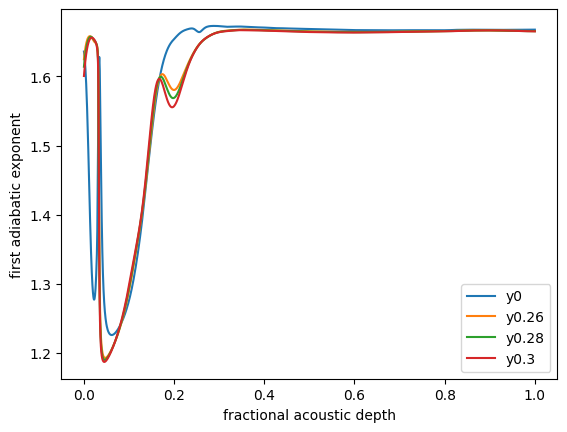

In [6]:
fig, ax = plt.subplots()

for key in dirs:
    tau0 = models[key].tau.max()
    ax.plot(models[key].tau/tau0, models[key].Gamma_1, label=key)
    
ax.set_xlabel("fractional acoustic depth")
ax.set_ylabel("first adiabatic exponent")
ax.legend();

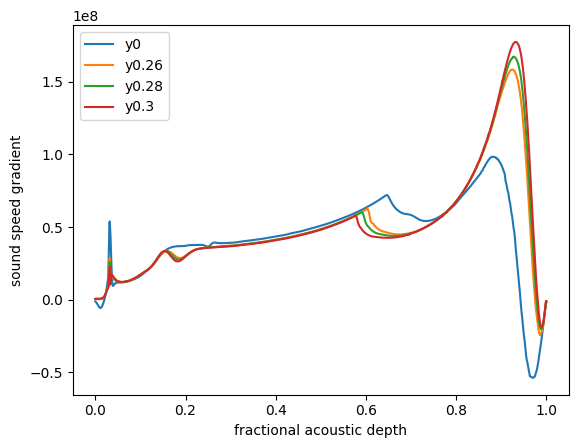

In [8]:
fig, ax = plt.subplots()

for key in dirs:
    tau0 = models[key].tau.max()
    ax.plot(models[key].tau/tau0, tau0*differentiate(models[key].cs, models[key].tau), label=key)
    
ax.set_xlabel("fractional acoustic depth")
ax.set_ylabel("sound speed gradient")
ax.legend();